In [17]:
import os
import cv2
import numpy as np
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
from imgaug import augmenters as iaa

## FEATURE EXTRACTION AND DATA PRE-PROCESSING

In [18]:
data_dir = "D:\\PLANT_DISEASE\\archive (7)\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\train_final" 

In [19]:
feature_vectors = []
labels = []

In [20]:
orientations = 9
pixels_per_cell = (8, 8)
cells_per_block = (2, 2)

In [21]:
augmentation = iaa.Sequential([
    iaa.Fliplr(0.5),  # 50% horizontal flips
    iaa.Affine(rotate=(-10, 10)),  # Random rotations between -10 and 10 degrees
    iaa.GaussianBlur(sigma=(0, 1.0)),  # Gaussian blur with a sigma between 0 and 1.0
    iaa.AdditiveGaussianNoise(scale=(0, 0.05 * 255)),  # Gaussian noise
])

In [22]:
for class_label in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, class_label)
    
    if not os.path.isdir(class_dir):
        continue

    for image_file in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_file)

        image = cv2.imread(image_path)
        
        # Apply image augmentation
        # image = augmentation.augment_image(image)

        image = cv2.resize(image, (128, 128))
        
        # Convert the image to grayscale (optional)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        features = hog(image, orientations=orientations, pixels_per_cell=pixels_per_cell,
                       cells_per_block=cells_per_block, visualize=False, block_norm='L2-Hys')

        feature_vectors.append(features)
        labels.append(class_label)

In [23]:
feature_vectors

[array([0.2306182 , 0.13346892, 0.22842676, ..., 0.2008946 , 0.08372439,
        0.0774525 ]),
 array([0.30268497, 0.03407904, 0.10203084, ..., 0.13499041, 0.09386709,
        0.0188746 ]),
 array([0.24507741, 0.16712842, 0.09481246, ..., 0.21598185, 0.13302201,
        0.05906967]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0.26896884, 0.06819541, 0.06751796, ..., 0.12907258, 0.22681382,
        0.12307657]),
 array([0.12067994, 0.06029988, 0.02615877, ..., 0.10159426, 0.10573402,
        0.1693393 ]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0.14337981, 0.03607985, 0.14257316, ..., 0.19394747, 0.173526  ,
        0.15666971]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0.15013769, 0.18806132, 0.09449181, ..., 0.09926599, 0.10428593,
        0.05731488]),
 array([0.53333671, 0.02430443, 0.00851027, ..., 0.1360495 , 0.13725736,
        0.09420267]),
 array([0.16412188, 0.08704129, 0.08575131, ..., 0.06727034, 0.053802  ,
        0.09400519]),
 array([0.27051795, 0.081765

In [24]:
labels

['Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___

In [25]:
X = np.array(feature_vectors)

In [26]:
y = np.array(labels)

In [27]:
print(X)

[[0.2306182  0.13346892 0.22842676 ... 0.2008946  0.08372439 0.0774525 ]
 [0.30268497 0.03407904 0.10203084 ... 0.13499041 0.09386709 0.0188746 ]
 [0.24507741 0.16712842 0.09481246 ... 0.21598185 0.13302201 0.05906967]
 ...
 [0.22472384 0.17387665 0.06076164 ... 0.19280963 0.22150087 0.08089366]
 [0.13373838 0.23024784 0.04265059 ... 0.18660502 0.13951595 0.        ]
 [0.22160249 0.14613205 0.12106675 ... 0.07971506 0.12589608 0.18472035]]


In [28]:
X.shape,y.shape

((7500, 8100), (7500,))

In [29]:
label_encoder = LabelEncoder()
y_enc = label_encoder.fit_transform(y)
y_enc

array([ 0,  0,  0, ..., 14, 14, 14], dtype=int64)

## 

In [30]:
df = pd.DataFrame(y,y_enc)
df

,0
0,Apple___Black_rot
0,Apple___Black_rot
0,Apple___Black_rot
0,Apple___Black_rot
0,Apple___Black_rot
...,...
14,Tomato___Tomato_Yellow_Leaf_Curl_Virus
14,Tomato___Tomato_Yellow_Leaf_Curl_Virus
14,Tomato___Tomato_Yellow_Leaf_Curl_Virus
14,Tomato___Tomato_Yellow_Leaf_Curl_Virus


In [31]:
df.drop_duplicates(inplace=True)
df

,0
0,Apple___Black_rot
1,Blueberry___healthy
2,Cherry_(including_sour)___Powdery_mildew
3,Corn_(maize)___Common_rust_
4,Grape___Black_rot
5,Orange___Haunglongbing_(Citrus_greening)
6,Peach___Bacterial_spot
7,"Pepper,_bell___Bacterial_spot"
8,Potato___Early_blight
9,Raspberry___healthy


## MODEL TRAINING 

In [32]:
svm_model = svm.SVC(kernel='linear', C=1.0, probability=True, decision_function_shape='ovr')

In [33]:
svm_model.fit(X, y_enc)

SVC(kernel='linear', probability=True)

# VALIDATING THE MODEL

In [34]:
data_valid_dir = "D:\\PLANT_DISEASE\\archive (7)\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\valid"
acuracy_valid = 0.943 

In [35]:
feature_vectors_valid = []
labels_valid = []

In [36]:
for class_label in os.listdir(data_valid_dir):
    class_dir = os.path.join(data_valid_dir, class_label)
    
    if not os.path.isdir(class_dir):
        continue

    for image_file in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_file)

        image = cv2.imread(image_path)

        image = cv2.resize(image, (128, 128))

        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        features = hog(image, orientations=orientations, pixels_per_cell=pixels_per_cell,
                       cells_per_block=cells_per_block, visualize=False, block_norm='L2-Hys')

        feature_vectors_valid.append(features)
        labels_valid.append(class_label)

In [37]:
feature_vectors_valid

[array([0.21328912, 0.        , 0.16700493, ..., 0.07994909, 0.22296044,
        0.14305417]),
 array([0.15237508, 0.07036889, 0.14665507, ..., 0.21957034, 0.12652922,
        0.13956495]),
 array([0.18057921, 0.00663334, 0.04575824, ..., 0.13672808, 0.13693613,
        0.10316129]),
 array([0.14837934, 0.06614929, 0.07827395, ..., 0.23985809, 0.09318912,
        0.        ]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0.21607873, 0.13672199, 0.04116568, ..., 0.15775564, 0.13203765,
        0.04620745]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0.2919783 , 0.04812105, 0.07872579, ..., 0.0538613 , 0.17429683,
        0.06966076]),
 array([0.22895477, 0.14064216, 0.1700406 , ..., 0.16830015, 0.17651345,
        0.09511412]),
 array([0.23984255, 0.07865992, 0.12987424, ..., 0.13177663, 0.17392774,
        0.08521013]),
 array([0.15702468, 0.24735834, 0.0691484 , ..., 0.23629224, 0.22758263,
        0.12082506]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0.23606311, 0.026144

In [38]:
labels_valid

['Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___

In [39]:
X_valid = np.array(feature_vectors_valid)
y_valid = np.array(labels_valid)

## LABEL ENCODING (PRE-PROCESSING)

In [40]:
label_encoder = LabelEncoder()
y_valid = label_encoder.fit_transform(y_valid)

In [41]:
y_valid_pred = svm_model.predict(X_valid)
accuracy_valid = accuracy_score(y_valid, y_valid_pred)
conf_matrix_valid = confusion_matrix(y_valid, y_valid_pred)
class_report_valid = classification_report(y_valid, y_valid_pred)

In [109]:
acuracy_valid

0.773

## VISUALISATION METRICS FOR VALIDATION

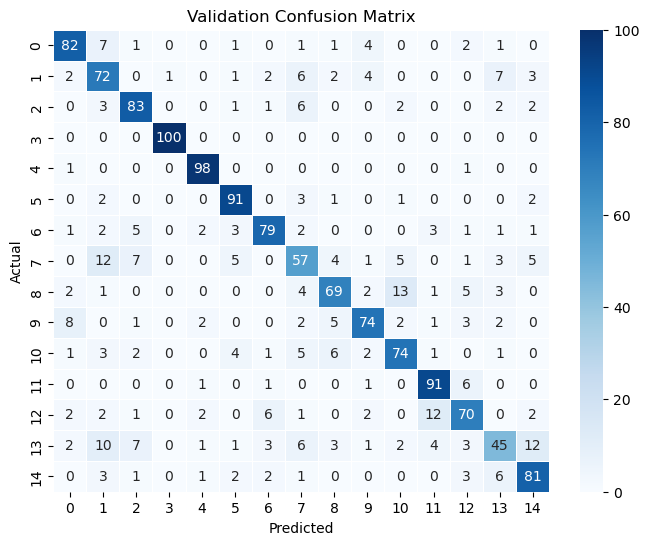

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_valid, annot=True, fmt='d', cmap='Blues', linewidths=.5)
plt.title('Validation Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [44]:
import pandas as pd
from sklearn.metrics import classification_report

# Your code for calculating classification_report

# Convert classification_report to a dictionary
class_report_dict = classification_report(y_valid, y_valid_pred, output_dict=True)

# Create a Pandas DataFrame from the dictionary
classification_report_df = pd.DataFrame(class_report_dict)

# Print the DataFrame
print('Validation Classification Report:')
classification_report_df


Validation Classification Report:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,accuracy,macro avg,weighted avg
precision,0.811881,0.615385,0.768519,0.990099,0.915888,0.834862,0.831579,0.606383,0.758242,0.813187,0.747475,0.80531,0.736842,0.633803,0.750000,0.777333,0.774630,0.774630
recall,0.820000,0.720000,0.830000,1.000000,0.980000,0.910000,0.790000,0.570000,0.690000,0.740000,0.740000,0.91000,0.700000,0.450000,0.810000,0.777333,0.777333,0.777333
f1-score,0.815920,0.663594,0.798077,0.995025,0.946860,0.870813,0.810256,0.587629,0.722513,0.774869,0.743719,0.85446,0.717949,0.526316,0.778846,0.777333,0.773790,0.773790
support,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,0.777333,1500.000000,1500.000000


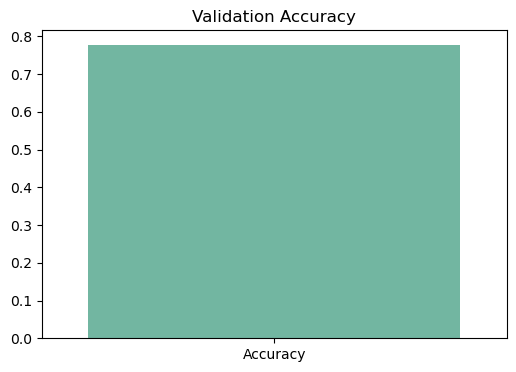

In [45]:
# Create a Seaborn barplot for accuracy
plt.figure(figsize=(6, 4))
sns.barplot(x=['Accuracy'], y=[accuracy_valid], palette='Set2')
plt.title('Validation Accuracy')
plt.show()

## MODEL TESTING

In [46]:
class_dir_test = "D:\\PLANT_DISEASE\\archive (7)\\test\\test_final"

In [47]:
feature_test=[]
label_test=[]

In [48]:
for image_file in os.listdir(class_dir_test):
    image_path = os.path.join(class_dir_test, image_file)
    
    # Load the image
    image = cv2.imread(image_path)
    
    # Resize the image to a fixed size (e.g., 128x128 pixels)
    image = cv2.resize(image, (128, 128))
    
    # Convert the image to grayscale (optional)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Extract HOG features from the image
    features = hog(image, orientations=orientations, pixels_per_cell=pixels_per_cell,
                    cells_per_block=cells_per_block, visualize=False, block_norm='L2-Hys')
    
    # Append the feature vector and label to the respective lists
    feature_test.append(features)
    label_test.append(image_file)

In [49]:
feature_test

[array([0.3878978 , 0.04213401, 0.02896267, ..., 0.09204177, 0.08195669,
        0.08477164]),
 array([0.17569234, 0.06930438, 0.14314371, ..., 0.        , 0.21528088,
        0.0906029 ]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0.38116011, 0.        , 0.        , ..., 0.2942634 , 0.2942634 ,
        0.2942634 ]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0.34665116, 0.2475154 , 0.        , ..., 0.06811334, 0.09349503,
        0.14697103]),
 array([0.21679891, 0.05887299, 0.12048961, ..., 0.10753159, 0.04857285,
        0.        ]),
 array([0.20518527, 0.15536076, 0.13425269, ..., 0.12229223, 0.13323229,
        0.11584329]),
 array([0.23169404, 0.05120109, 0.09467042, ..., 0.18466962, 0.11242249,
        0.2215013 ]),
 array([0.23211236, 0.10355923, 0.2093943 , ..., 0.0656748 , 0.10546845,
        0.17560894]),
 array([0.20376697, 0.11517297, 0.1362592 , ..., 0.12960245, 0.07519557,
        0.0

In [50]:
label_test

['Apple_Black_rot (1).JPG',
 'Apple_Black_rot (2).JPG',
 'Apple_Black_rot (3).JPG',
 'Apple___Black_rot.JPG',
 'Corn_(maize)___Common_rust_ (1).JPG',
 'Corn_(maize)___Common_rust_ (2).JPG',
 'Corn_(maize)___Common_rust_ (3).JPG',
 'Corn_(maize)___Common_rust_.JPG',
 'Grape_Black_rot (1).JPG',
 'Grape_Black_rot (2).JPG',
 'Grape_Black_rot (3).JPG',
 'Grape___Black_rot.JPG',
 'Orange_Haunglingbing (1).JPG',
 'Orange_Haunglingbing (2).JPG',
 'Orange_Haunglingbing (3).JPG',
 'Orange___Haunglongbing_(Citrus_greening).JPG',
 'Peach_Bacterial_spot (1).JPG',
 'Peach_Bacterial_spot (2).JPG',
 'Peach_Bacterial_spot (3).JPG',
 'Peach___Bacterial_spot.JPG',
 'PotatoEarlyBlight1.JPG',
 'PotatoEarlyBlight2.JPG',
 'PotatoEarlyBlight4.JPG',
 'Potato___Early_blight.JPG',
 'Squash___Powdery_mildew.JPG',
 'Strawberry_lear_scorch (1).JPG',
 'Strawberry_lear_scorch (2).JPG',
 'Strawberry___Leaf_scorch.JPG',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus (4).JPG',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus (5).JPG'

In [51]:
x_test =np.array(feature_test)
y_test = np.array([0,0,0,0,3,3,3,3,4,4,4,4,5,5,5,5,6,6,6,6,8,8,8,8,11,12,12,12,14,14,14,14])


In [52]:
y_test_pred = svm_model.predict(x_test)

In [53]:
y_test.shape

(32,)

In [54]:
y_test_pred.shape

(32,)

In [55]:
y_test

array([ 0,  0,  0,  0,  3,  3,  3,  3,  4,  4,  4,  4,  5,  5,  5,  5,  6,
        6,  6,  6,  8,  8,  8,  8, 11, 12, 12, 12, 14, 14, 14, 14])

In [56]:
y_test_pred

array([ 0,  0,  0,  0,  3,  3,  3,  3,  4,  4,  4,  4,  7,  5,  5,  5,  6,
        6, 11,  6,  8,  8,  8,  8, 11, 12, 12, 12, 14, 14, 14, 14],
      dtype=int64)

### ACCURACY BEFORE HYPERPARAMETER TUNING

In [57]:
accuracy_test = accuracy_score(y_test, y_test_pred)
conf_matrix_valid = confusion_matrix(y_test, y_test_pred)
class_report_valid = classification_report(y_test, y_test_pred, zero_division=1)

In [58]:
accuracy_test

0.9375

## GRID SEARCH (HYPER PARAMETER TUNING)

In [59]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid = {
    'C': [0.1, 1, 10],     # Regularization parameter
}

# Create the Grid Search object
grid_search = GridSearchCV(
    estimator=SVC(probability=True),  # Your SVM model
    param_grid=param_grid,
    cv=5,        # Number of cross-validation folds
    n_jobs=-1,    # Use all available CPU cores
    scoring='accuracy',  # You can change the scoring metric
    verbose=2,    # Verbosity level (0, 1, 2)
)

grid_search.fit(X, y_enc)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)

best_model.fit(X, y_enc)


Fitting 5 folds for each of 3 candidates, totalling 15 fits


Best Hyperparameters: {'C': 10}


SVC(C=10, probability=True)

## RESULTS OF EACH FIT

In [60]:
import pandas as pd

results = grid_search.cv_results_

results_df = pd.DataFrame(results)

results_df


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,8235.316207,13.394488,68.244173,5.996707,0.1,{'C': 0.1},0.579333,0.594000,0.604000,0.592667,0.558667,0.585733,0.015644,3
1,7400.918427,30.254747,283.297120,8.184889,1,{'C': 1},0.791333,0.790667,0.780000,0.782000,0.785333,0.785867,0.004529,2
2,7780.473889,24.945034,168.603842,9.947312,10,{'C': 10},0.806667,0.806000,0.797333,0.798000,0.804000,0.802400,0.003969,1


# TUNED MODEL TRANING 

In [61]:
svm_model_tuned = svm.SVC(kernel='linear', C=10, probability=True, decision_function_shape='ovr')

In [62]:
svm_model_tuned.fit(X, y_enc)

SVC(C=10, kernel='linear', probability=True)

In [98]:
class_dir_test = "D:\\PLANT_DISEASE\\archive (7)\\test\\test_final"

In [99]:
feature_test=[]
label_test=[]

In [100]:
for image_file in os.listdir(class_dir_test):
    image_path = os.path.join(class_dir_test, image_file)
    
    image = cv2.imread(image_path)
    
    image = cv2.resize(image, (128, 128))
    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    features = hog(image, orientations=orientations, pixels_per_cell=pixels_per_cell,
                    cells_per_block=cells_per_block, visualize=False, block_norm='L2-Hys')
    
    feature_test.append(features)
    label_test.append(image_file)

In [101]:
x_test =np.array(feature_test)
y_test = np.array([0,0,0,0,3,3,3,3,4,4,4,4,5,5,5,5,6,6,6,6,8,8,8,8,11,12,12,12,14,14,14,14])


In [102]:
y_test_pred = svm_model_tuned.predict(x_test)

## ACCURACY IMPROVEMENT AFTER TUNING

In [103]:
accuracy_test = accuracy_score(y_test, y_test_pred)
conf_matrix_valid = confusion_matrix(y_test, y_test_pred)
class_report_valid = classification_report(y_test, y_test_pred, zero_division=1)

In [104]:
accuracy_test

0.9375

## PERFORMANCE METRICS

In [105]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_test,y_test_pred)
conf_matrix = confusion_matrix(y_test,y_test_pred)
class_report = classification_report(y_test,y_test_pred)
precision = precision_score(y_test,y_test_pred, average='weighted')
recall = recall_score(y_test,y_test_pred, average='weighted')
f1 = f1_score(y_test,y_test_pred, average='weighted')

c:\Users\kanna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kanna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kanna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kanna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1

In [106]:
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Value': [accuracy, precision, recall, f1]
})

metrics_df

,Metric,Value
0,Accuracy,0.937500
1,Precision,0.984375
2,Recall,0.937500
3,F1-Score,0.953869


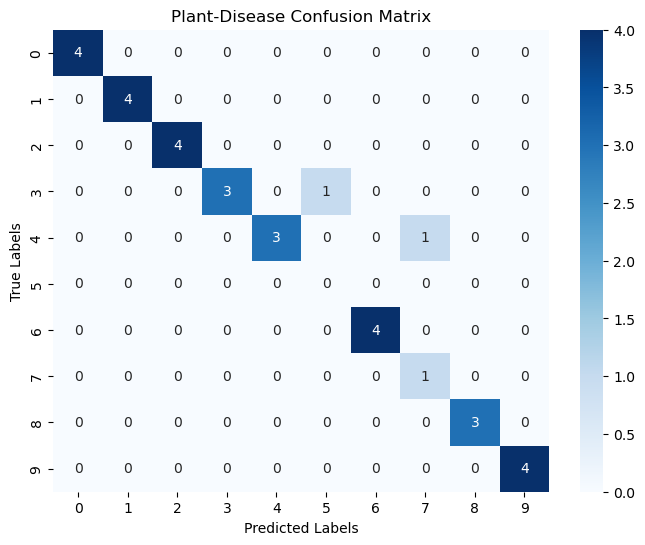

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
ax = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Plant-Disease Confusion Matrix')

plt.show()

# SAVING THE TUNED MODEL

In [70]:
from joblib import dump

dump(svm_model_tuned, 'SVM_PLANT_DISEASE.joblib')

['SVM_PLANT_DISEASE.joblib']

## IMAGE TRANSFORMATION

In [71]:
test_image_path = "D:\\PLANT_DISEASE\\archive (7)\\test\\test_final\\Grape_Black_rot (3).JPG"

In [72]:
image = cv2.imread(test_image_path)

In [73]:
image

array([[[158, 159, 163],
        [169, 170, 174],
        [134, 135, 139],
        ...,
        [133, 134, 144],
        [143, 144, 154],
        [126, 127, 137]],

       [[166, 167, 171],
        [185, 186, 190],
        [147, 148, 152],
        ...,
        [123, 124, 134],
        [ 81,  82,  92],
        [112, 113, 123]],

       [[128, 129, 133],
        [140, 141, 145],
        [142, 143, 147],
        ...,
        [125, 126, 136],
        [152, 153, 163],
        [173, 174, 184]],

       ...,

       [[178, 177, 179],
        [175, 174, 176],
        [174, 173, 175],
        ...,
        [153, 153, 159],
        [159, 159, 165],
        [163, 163, 169]],

       [[171, 170, 172],
        [176, 175, 177],
        [178, 177, 179],
        ...,
        [151, 151, 157],
        [161, 161, 167],
        [173, 173, 179]],

       [[163, 162, 164],
        [174, 173, 175],
        [179, 178, 180],
        ...,
        [143, 143, 149],
        [151, 151, 157],
        [166, 166, 172]]

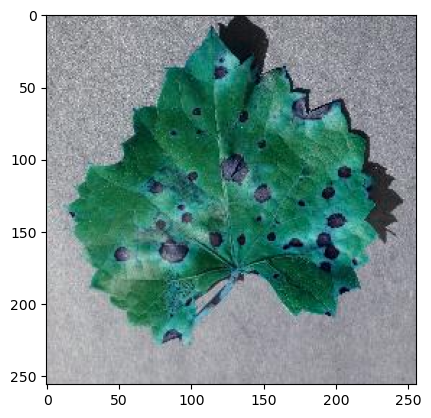

In [74]:
plt.imshow(image)
plt.show()

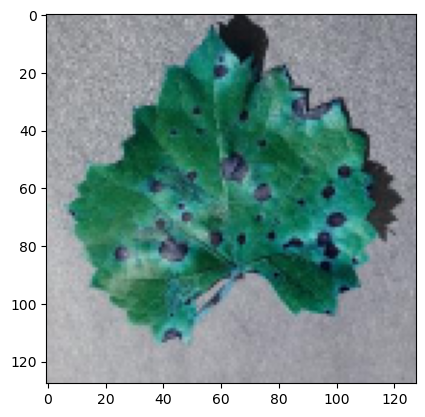

In [75]:
image = cv2.resize(image, (128, 128))
plt.imshow(image)
plt.show()

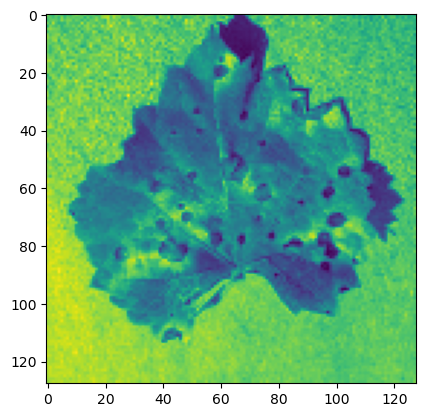

In [76]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image)
plt.show()

In [77]:
x_test = hog(image, orientations=orientations, pixels_per_cell=pixels_per_cell,
                       cells_per_block=cells_per_block, visualize=False, block_norm='L2-Hys')
x_test

array([0.23169404, 0.05120109, 0.09467042, ..., 0.18466962, 0.11242249,
       0.2215013 ])

## PREDICTIVE SYSTEM (USING THE SAVED MODEL)

In [78]:
from joblib import load
loaded_svm_model = load("D:\\PLANT_DISEASE\\archive (7)\\SVM_PLANT_DISEASE.joblib")

In [79]:
y_test_pred = loaded_svm_model.predict(x_test.reshape(1, -1))

In [80]:
y_test_pred[0]

4

In [81]:
dict = {
    0	: "Apple-Black-rot",
1:	"Blueberry-healthy",
2:	"Cherry-Powdery-mildew",
3:	"Corn-(maize)-Common-rust",
4:	"Grape-Black-rot",
5:	"Orange-Haunglongbing-(Citrus_greening)",
6:	"Peach-Bacterial-spot",
7:	"Pepper-bell-Bacterial-spot",
8:	"Potato-Early-blight",
9:	"Raspberry-healthy",
10:	"Soybean-healthy",
11:	"Squash-Powdery-mildew",
12:	"Strawberry-Leaf-scorch",
13:	"Tomato-Early-blight",
14:	"Tomato-Tomato-Yellow-Leaf-Curl-Viru",
    
}

In [82]:
dict[y_test_pred[0]]

'Grape-Black-rot'

## VISUALISATION (USING DIMENSIONALITY REDUCTION)

In [83]:
X.shape,y.shape

((7500, 8100), (7500,))

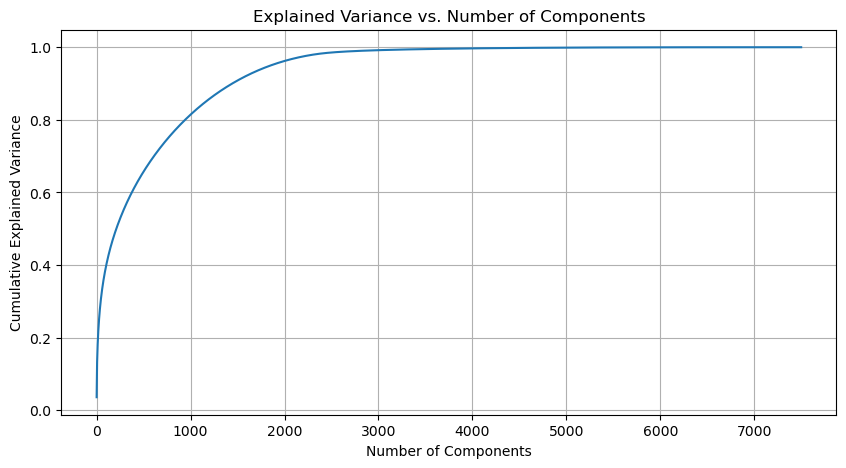

In [84]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA()

pca.fit(X)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 5))
plt.plot(cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid()
plt.show()

In [85]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3000)

x_pca = pca.fit_transform(X)


In [86]:
x_pca.shape,y.shape


((7500, 3000), (7500,))

In [87]:
df = pd.DataFrame(x_pca)
df

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
0,-0.353252,-0.840564,-0.994494,0.593439,-0.196132,-0.118514,0.855202,-0.894554,-0.382983,-0.007882,...,-0.007512,-0.017346,0.017799,0.009241,-0.010391,0.001414,0.022196,0.014071,0.022512,0.029012
1,-0.355191,-1.243878,-0.178584,0.753212,-0.100948,0.360354,-0.335312,-0.399458,-0.417149,-0.010448,...,0.007234,0.010067,-0.019475,0.019708,-0.017489,0.016037,-0.002162,0.000138,0.017381,0.015050
2,-0.424512,-1.113491,-0.297861,0.680344,-0.176030,0.325187,0.309495,-0.526262,0.525315,0.542422,...,-0.007271,0.011192,0.008955,0.003676,-0.008293,0.005813,-0.021964,-0.016142,-0.006721,0.028681
3,2.171722,0.318889,-0.603505,4.362394,-0.173255,0.122178,0.583696,-0.252044,0.456435,-0.211913,...,-0.011769,0.008836,-0.014765,-0.003937,-0.014261,0.022900,-0.009225,0.040032,-0.007555,0.019608
4,-0.141556,-0.156856,-0.337249,-0.491358,0.315878,1.144522,0.383253,-0.282857,-2.107894,-0.050300,...,-0.027283,0.032558,-0.033012,-0.002967,-0.016636,-0.009795,0.002719,-0.020959,0.007773,-0.030868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,-1.024795,1.735009,2.549669,-0.769239,1.731102,-1.708029,1.893686,0.129349,-0.042068,0.891799,...,-0.026670,-0.003997,-0.017079,0.004878,0.009915,0.036887,-0.009775,-0.008805,-0.019923,0.006754
7496,-0.269296,-0.966391,1.949614,0.777088,-1.224380,-1.294816,-0.416970,-0.801767,0.004220,-0.478731,...,0.002529,-0.001298,0.024425,-0.007809,-0.006855,-0.019049,-0.023916,0.012133,-0.053600,-0.015765
7497,-0.871903,0.322688,-1.376373,-0.335832,0.613099,-0.675550,0.072168,0.488077,-0.282086,-0.608641,...,0.037606,0.026635,0.014920,0.005983,-0.003871,0.001126,0.011602,-0.012733,0.009404,-0.001982
7498,-0.686404,0.039189,-0.349691,-0.109039,-1.929338,0.361172,-1.067934,1.454776,0.611792,-0.528178,...,-0.075755,-0.016111,0.002704,0.024432,0.010597,0.017496,0.000729,0.011392,-0.039064,0.016831


## SUPPORT VECTOR PLOT

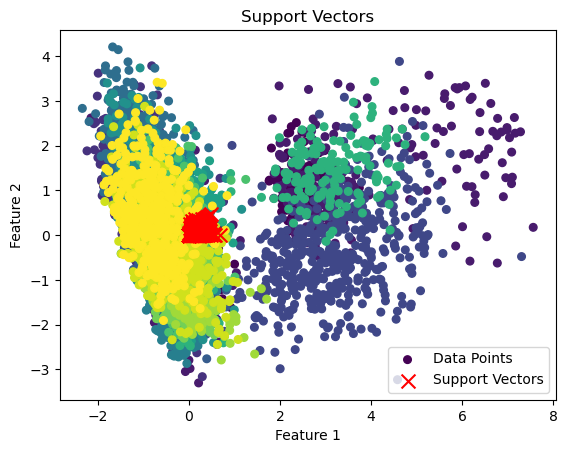

In [89]:
support_vectors = svm_model_tuned.support_vectors_
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y_enc, cmap='viridis', s=30, label='Data Points')
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], c='r', marker='x', s=100, label='Support Vectors')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Support Vectors')
plt.legend()
plt.show()


## HYPER - PARAMETER PLOT

In [93]:
results = grid_search.cv_results_
param_values = [f'{params["C"]}' for params in results['params']]
mean_scores = results['mean_test_score']

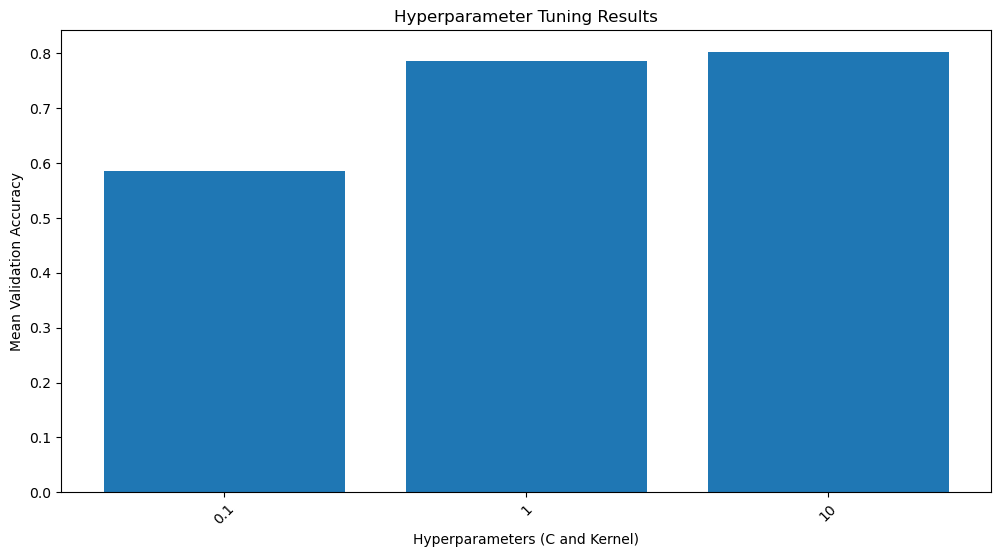

In [94]:
plt.figure(figsize=(12, 6))
plt.bar(param_values, mean_scores)
plt.xlabel('Hyperparameters (C and Kernel)')
plt.ylabel('Mean Validation Accuracy')
plt.title('Hyperparameter Tuning Results')
plt.xticks(rotation=45)
plt.show()

## LEARNING CURVE

In [95]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    svm_model, X, y_enc, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

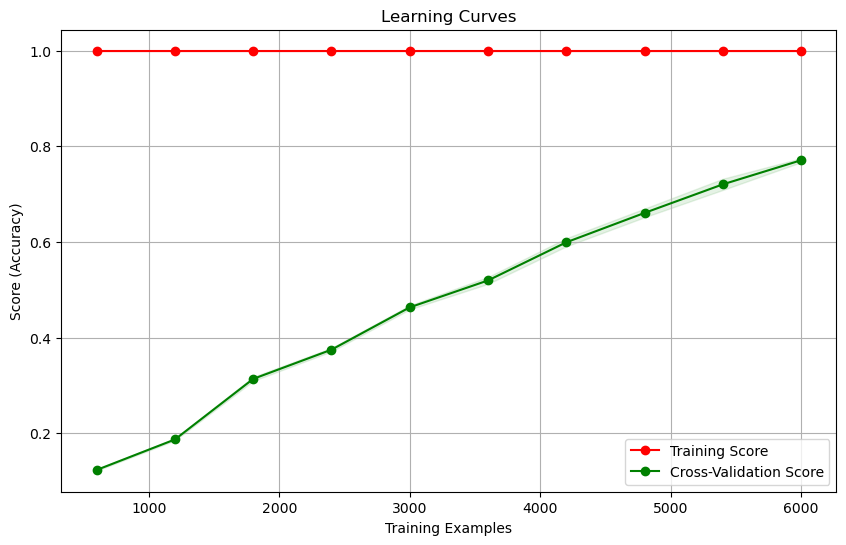

In [96]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.title("Learning Curves")
plt.xlabel("Training Examples")
plt.ylabel("Score (Accuracy)")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")

plt.legend(loc="best")
plt.show()

## ERROR CURVE - (MISCLASSIFICATION)

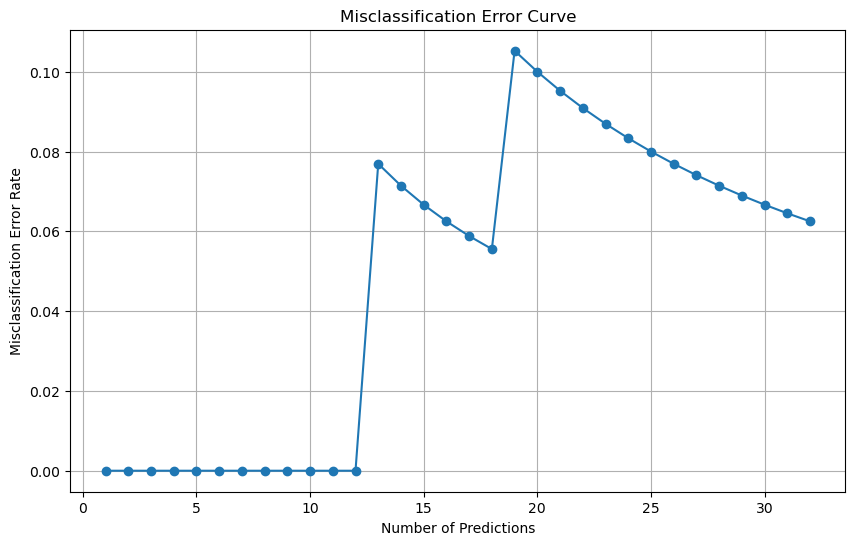

In [110]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

error_rate_values = []

for i in range(1, len(y_test_pred) + 1):
    error_rate = 1 - accuracy_score(y_test[:i], y_test_pred[:i])
    error_rate_values.append(error_rate)

x_values = range(1, len(y_test_pred) + 1)

plt.figure(figsize=(10, 6))
plt.plot(x_values, error_rate_values, marker='o', linestyle='-')
plt.title('Misclassification Error Curve')
plt.xlabel('Number of Predictions')
plt.ylabel('Misclassification Error Rate')
plt.grid()
plt.show()